In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Import

In [2]:
data = pd.read_csv('../data/dax_indicator_2000_2024.csv')
data.head()

,Date,volume,direction_num,direction,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,2000-02-18,52728400,-10.610352,0,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,...,0,0,0,1,0,0,1,0,0,1
1,2000-02-21,24404000,22.189941,1,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,...,0,0,0,1,0,1,1,0,0,1
2,2000-02-22,51082700,27.560059,1,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,...,0,0,1,1,0,0,1,0,0,1
3,2000-02-23,42673800,79.140137,1,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,...,0,0,0,0,0,0,1,0,0,1
4,2000-02-24,38686700,-56.390137,0,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,...,0,0,0,1,0,0,1,0,0,1


In [3]:
data.drop('Date', axis=1, inplace=True)
data.head()

,volume,direction_num,direction,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,-10.610352,0,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,...,0,0,0,1,0,0,1,0,0,1
1,24404000,22.189941,1,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,...,0,0,0,1,0,1,1,0,0,1
2,51082700,27.560059,1,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,...,0,0,1,1,0,0,1,0,0,1
3,42673800,79.140137,1,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,...,0,0,0,0,0,0,1,0,0,1
4,38686700,-56.390137,0,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,...,0,0,0,1,0,0,1,0,0,1


# X y validation Split

In [4]:
y = data[['direction']]
X = data.drop(['direction','direction_num'],axis=1) #

In [5]:
X.head()

,volume,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,BBP_7_2.0,BBB_14_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,5.163819,13.074441,...,0,0,0,1,0,0,1,0,0,1
1,24404000,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,5.130389,9.891575,...,0,0,0,1,0,1,1,0,0,1
2,51082700,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,5.026563,7.812410,...,0,0,1,1,0,0,1,0,0,1
3,42673800,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,4.147068,6.159206,...,0,0,0,0,0,0,1,0,0,1
4,38686700,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,4.128267,5.911273,...,0,0,0,1,0,0,1,0,0,1


#### Imput the list of position columns

In [6]:
cat_col_names = pd.read_csv('../data/temp_cat_col_names.csv')
cat_col_names.drop('Unnamed: 0', axis=1, inplace=True)
cat_col_names = cat_col_names['0'].tolist()
cat_col_names

['pos_sma_3',
 'pos_sma_7',
 'pos_sma_14',
 'pos_ema_3',
 'pos_ema_7',
 'pos_ema_14',
 'pos_BBL_3_2.0',
 'pos_BBM_3_2.0',
 'pos_BBU_3_2.0',
 'pos_BBL_7_2.0',
 'pos_BBM_7_2.0',
 'pos_BBU_7_2.0',
 'pos_BBL_14_2.0',
 'pos_BBM_14_2.0',
 'pos_BBU_14_2.0']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=99, shuffle=False)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)

In [9]:
X_train_num = X_train.select_dtypes(np.number)
X_train_num.drop(cat_col_names, axis=1, inplace=True)
X_train_cat = X_train[cat_col_names]


X_test_num = X_test.select_dtypes(np.number)
X_test_num.drop(cat_col_names, axis=1, inplace=True)
X_test_cat = X_test[cat_col_names]


X_val_num = X_val.select_dtypes(np.number)
X_val_num.drop(cat_col_names, axis=1, inplace=True)
X_val_cat = X_val[cat_col_names]

In [10]:
X_train_num

,volume,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,BBP_7_2.0,BBB_14_2.0,...,cmf_14,ADX_3,DMP_3,DMN_3,ADX_7,DMP_7,DMN_7,ADX_14,DMP_14,DMN_14
0,52728400,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,5.163819,13.074441,...,0.252326,199.120827,-4.280509,203.401335,199.120827,-4.280509,203.401335,199.120827,-4.280509,203.401335
1,24404000,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,5.130389,9.891575,...,0.261696,194.131292,-7.416034,201.547327,194.131292,-7.416034,201.547327,194.131292,-7.416034,201.547327
2,51082700,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,5.026563,7.812410,...,0.237565,189.345973,-9.761083,199.107056,189.345973,-9.761083,199.107056,189.345973,-9.761083,199.107056
3,42673800,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,4.147068,6.159206,...,0.153451,184.827846,-11.423367,196.251214,184.827846,-11.423367,196.251214,184.827846,-11.423367,196.251214
4,38686700,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,4.128267,5.911273,...,0.071547,186.443378,-7.846269,194.289647,186.443378,-7.846269,194.289647,186.443378,-7.846269,194.289647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,85263200,12451.533203,74.290450,72.349849,66.648924,0.488993,0.402535,6.127371,6.926924,5.906158,...,0.110944,95.786779,27.533628,68.253151,95.786779,27.533628,68.253151,95.786779,27.533628,68.253151
4369,79318800,12463.233398,86.106802,77.175814,69.594482,1.016506,0.488993,4.738643,6.127371,6.346743,...,0.114569,105.328323,29.660138,75.668185,105.328323,29.660138,75.668185,105.328323,29.660138,75.668185
4370,102442000,12491.250000,88.390277,78.428953,70.397751,1.233393,1.016506,0.989390,4.738643,6.729574,...,0.177844,113.194181,30.020796,83.173385,113.194181,30.020796,83.173385,113.194181,30.020796,83.173385
4371,104480300,12561.173503,95.324294,84.428648,74.723514,1.967296,1.233393,2.146541,0.989390,7.276789,...,0.248167,127.634825,35.569153,92.065673,127.634825,35.569153,92.065673,127.634825,35.569153,92.065673


In [11]:
X_train_cat

,pos_sma_3,pos_sma_7,pos_sma_14,pos_ema_3,pos_ema_7,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4369,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4370,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4371,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


# Class Imbalance

In [12]:
y.value_counts()

direction
1            3171
0            2904
Name: count, dtype: int64

# Transformer

In [13]:
#for col in X_test_num.columns:
   # print("Skewness from {} : {}".format(col,round(X_test_num[col].skew(),2)))

In [14]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(standardize=True)
transformer.fit(X_train_num) 

path = "./pickle/"
filename = "power_transformer_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

X_train_transformed = transformer.transform(X_train_num)
X_test_transformed = transformer.transform(X_test_num)
X_val_transformed = transformer.transform(X_val_num)

X_train_num_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df  = pd.DataFrame(X_test_transformed,  columns=X_test_num.columns, index=X_test_num.index)
X_val_num_transformed_df = pd.DataFrame(X_val_transformed, columns=X_val_num.columns, index=X_val_num.index)

In [15]:
for col in X_train_num_transformed_df.columns:
    print("Skewness from {} : {}".format(col,round(X_train_num_transformed_df[col].skew(),2)))

Skewness from volume : 0.03
Skewness from sma_3 : -0.02
Skewness from rsi_3 : -0.25
Skewness from rsi_7 : -0.11
Skewness from rsi_14 : -0.06
Skewness from BBB_3_2.0 : 0.01
Skewness from BBP_3_2.0 : 0.01
Skewness from BBB_7_2.0 : 0.0
Skewness from BBP_7_2.0 : 0.0
Skewness from BBB_14_2.0 : 0.0
Skewness from BBP_14_2.0 : 0.0
Skewness from STOCHk_14_3_3 : -0.34
Skewness from STOCHd_14_3_3 : -0.32
Skewness from atr_3 : -0.0
Skewness from atr_7 : -0.01
Skewness from atr_14 : -0.01
Skewness from cmf_3 : -0.01
Skewness from cmf_7 : -0.01
Skewness from cmf_14 : -0.0
Skewness from ADX_3 : 0.14
Skewness from DMP_3 : -0.09
Skewness from DMN_3 : 0.15
Skewness from ADX_7 : 0.14
Skewness from DMP_7 : -0.09
Skewness from DMN_7 : 0.15
Skewness from ADX_14 : 0.14
Skewness from DMP_14 : -0.09
Skewness from DMN_14 : 0.15


# Scaler X

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num_transformed_df)

path = "./pickle/"
filename = "min_max_scaler_x.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_scaled = scaler.transform(X_train_num_transformed_df)
X_test_scaled  = scaler.transform(X_test_num_transformed_df)
X_val_scaled  = scaler.transform(X_val_num_transformed_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num_transformed_df.columns, index=X_train_num_transformed_df.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_num_transformed_df.columns, index=X_test_num_transformed_df.index)
X_val_scaled_df  = pd.DataFrame(X_val_scaled,  columns=X_val_num_transformed_df.columns, index=X_val_num_transformed_df.index)

# Concat

In [17]:
X_train_concat = pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test_concat = pd.concat([X_test_scaled_df, X_test_cat], axis=1)
X_val_concat = pd.concat([X_val_scaled_df , X_val_cat], axis=1)

In [18]:
pd.set_option('display.max_rows', None)
display(X_train_concat.describe().T)
pd.reset_option('display.max_rows')

,count,mean,std,min,25%,50%,75%,max
volume,4373.0,0.535010,0.112736,0.0,0.474681,0.533740,0.600294,1.0
sma_3,4373.0,0.543551,0.214048,0.0,0.392795,0.541998,0.673847,1.0
rsi_3,4373.0,0.562664,0.254471,0.0,0.351803,0.587113,0.780499,1.0
rsi_7,4373.0,0.516594,0.188968,0.0,0.369545,0.525529,0.663574,1.0
rsi_14,4373.0,0.525259,0.173258,0.0,0.397769,0.530284,0.652906,1.0
BBB_3_2.0,4373.0,0.461405,0.176628,0.0,0.335489,0.466913,0.584076,1.0
BBP_3_2.0,4373.0,0.461332,0.176642,0.0,0.335372,0.466874,0.583998,1.0
BBB_7_2.0,4373.0,0.530605,0.154378,0.0,0.424115,0.529058,0.635094,1.0
BBP_7_2.0,4373.0,0.530504,0.154375,0.0,0.423978,0.528989,0.634957,1.0
BBB_14_2.0,4373.0,0.532205,0.161675,0.0,0.420510,0.535946,0.640709,1.0


# Checking Shapes

In [19]:
X_train_concat.shape, y_train.shape

((4373, 43), (4373, 1))

In [20]:
X_test_concat.shape, y_test.shape

((1094, 43), (1094, 1))

In [21]:
X_val_concat.shape, y_val.shape

((608, 43), (608, 1))

# Neural Network

## Classification

In [22]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.initializers import RandomNormal 
from keras.utils import plot_model

In [23]:
early_stopping = EarlyStopping(patience=5)
initializer = RandomNormal(mean=0., stddev=1., seed=14)

model = keras.Sequential()

model.add(Dense(units = 32,input_dim = X_train.shape[1], activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(Dense(units = 16,activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(Dense(units = 2, kernel_initializer=initializer, activation='softmax'))


model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',#binary_crossentropy ,categorical_crossentropy
              metrics=['accuracy']
              )


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1408      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1970 (7.70 KB)
Trainable params: 1970 (7.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
y_train_a = keras.utils.to_categorical(y_train, num_classes=2)

In [25]:
y_train_a.shape

(4373, 2)

In [26]:
X_train_concat.shape

(4373, 43)

In [27]:
checkpoint_path = './Neural Network/cls-nn1_{epoch:03d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [28]:
history = model.fit(
    X_train_concat,
    y_train_a,
    epochs=100,
    validation_split=0.20,
    batch_size=32,
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/100



Epoch 1: saving model to ./Neural Network\cls-nn1_001-1.37.hdf5
110/110 - 1s - loss: 3.4103 - accuracy: 0.5132 - val_loss: 1.3713 - val_accuracy: 0.4971 - 681ms/epoch - 6ms/step
Epoch 2/100

Epoch 2: saving model to ./Neural Network\cls-nn1_002-0.97.hdf5


C:\Users\schue\IronHack\Bootcamp\Week_9\Final_project\proj_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 - 0s - loss: 1.8731 - accuracy: 0.5014 - val_loss: 0.9708 - val_accuracy: 0.5029 - 173ms/epoch - 2ms/step
Epoch 3/100

Epoch 3: saving model to ./Neural Network\cls-nn1_003-0.79.hdf5
110/110 - 0s - loss: 1.2737 - accuracy: 0.5031 - val_loss: 0.7893 - val_accuracy: 0.5291 - 191ms/epoch - 2ms/step
Epoch 4/100

Epoch 4: saving model to ./Neural Network\cls-nn1_004-0.74.hdf5
110/110 - 0s - loss: 0.9970 - accuracy: 0.5017 - val_loss: 0.7424 - val_accuracy: 0.4846 - 211ms/epoch - 2ms/step
Epoch 5/100

Epoch 5: saving model to ./Neural Network\cls-nn1_005-0.71.hdf5
110/110 - 0s - loss: 0.9039 - accuracy: 0.5080 - val_loss: 0.7143 - val_accuracy: 0.5223 - 167ms/epoch - 2ms/step
Epoch 6/100

Epoch 6: saving model to ./Neural Network\cls-nn1_006-0.70.hdf5
110/110 - 0s - loss: 0.8276 - accuracy: 0.5189 - val_loss: 0.7050 - val_accuracy: 0.5029 - 169ms/epoch - 2ms/step
Epoch 7/100

Epoch 7: saving model to ./Neural Network\cls-nn1_007-0.70.hdf5
110/110 - 0s - loss: 0.7756 - accuracy: 0.529

In [29]:
def plot_metric(history: keras.callbacks.History, metric: str):
    '''
    Function to plot the training, and validation loss of a neural network during the training.

    Inputs:
    history: Keras callback with the historical progress

    metric: which metric of the training progress we want to plot

    Outputs:
    None
    '''
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    fig.set_facecolor('#FFFCF7')
    ax.set_facecolor('#FFFCF7')
    plt.tight_layout()
    plt.show()
    fig.savefig("../plots/validation_loss.png")

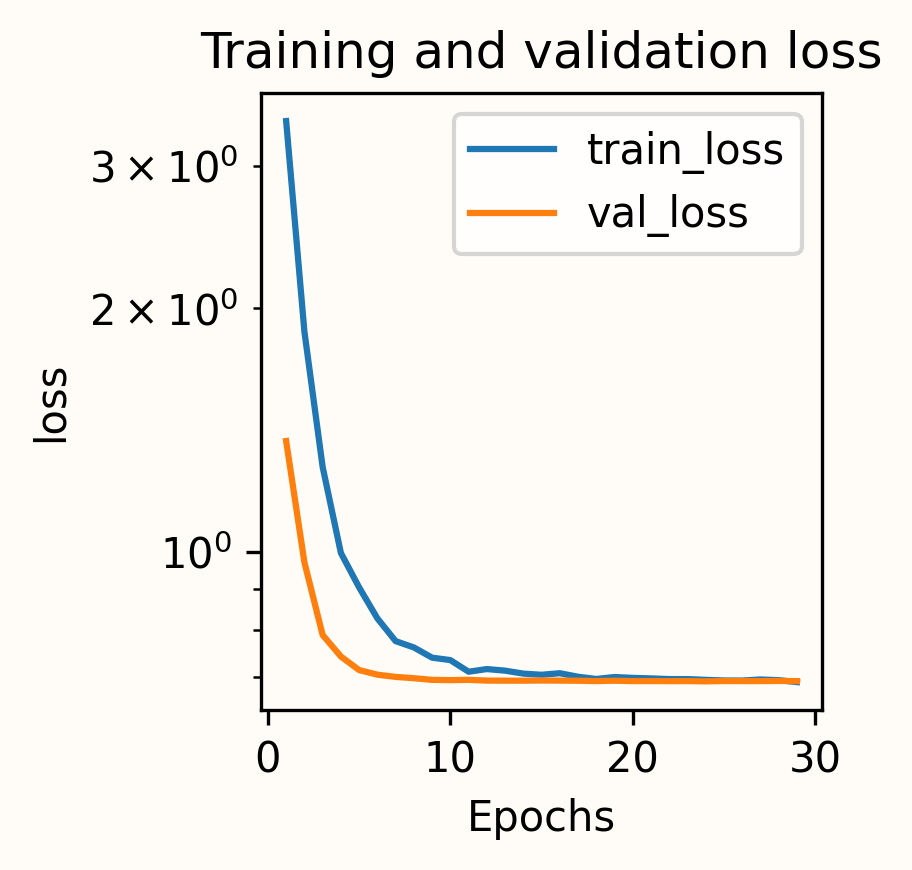

In [30]:
disp = plot_metric(history,'loss')

In [31]:
from sklearn.metrics import cohen_kappa_score, classification_report

def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [32]:
y_train_pred = model.predict(X_train_concat) 
y_test_pred  = model.predict(X_test_concat) 
y_val_pred  = model.predict(X_val_concat) 

y_train_pred = np.argmax(y_train_pred, axis=1).reshape(-1,1)
y_test_pred  = np.argmax(y_test_pred, axis=1).reshape(-1,1)
y_val_pred  = np.argmax(y_val_pred, axis=1).reshape(-1,1)

model_performance_class(y_train, y_train_pred, y_test, y_test_pred)

19/19 [==============================] - 0s 565us/step
Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.01
              precision    recall  f1-score   support

           0       0.51      0.08      0.13      2092
           1       0.52      0.93      0.67      2281

    accuracy                           0.52      4373
   macro avg       0.52      0.50      0.40      4373
weighted avg       0.52      0.52      0.41      4373

Results obtained for the TEST SET
The Cohen's Kappa is: 0.04
              precision    recall  f1-score   support

           0       0.59      0.11      0.19       528
           1       0.53      0.93      0.67       566

    accuracy                           0.53      1094
   macro avg       0.56      0.52      0.43      1094
weighted avg       0.56      0.53      0.44      1094



In [33]:
model.predict(X_train_concat)

137/137 [==============================] - 0s 862us/step


array([[0.41785327, 0.5821467 ],
       [0.43246615, 0.56753385],
       [0.3883131 , 0.6116869 ],
       ...,
       [0.43246615, 0.56753385],
       [0.43246615, 0.56753385],
       [0.43246615, 0.56753385]], dtype=float32)

# Results

##  Confusion Matrix Train Set

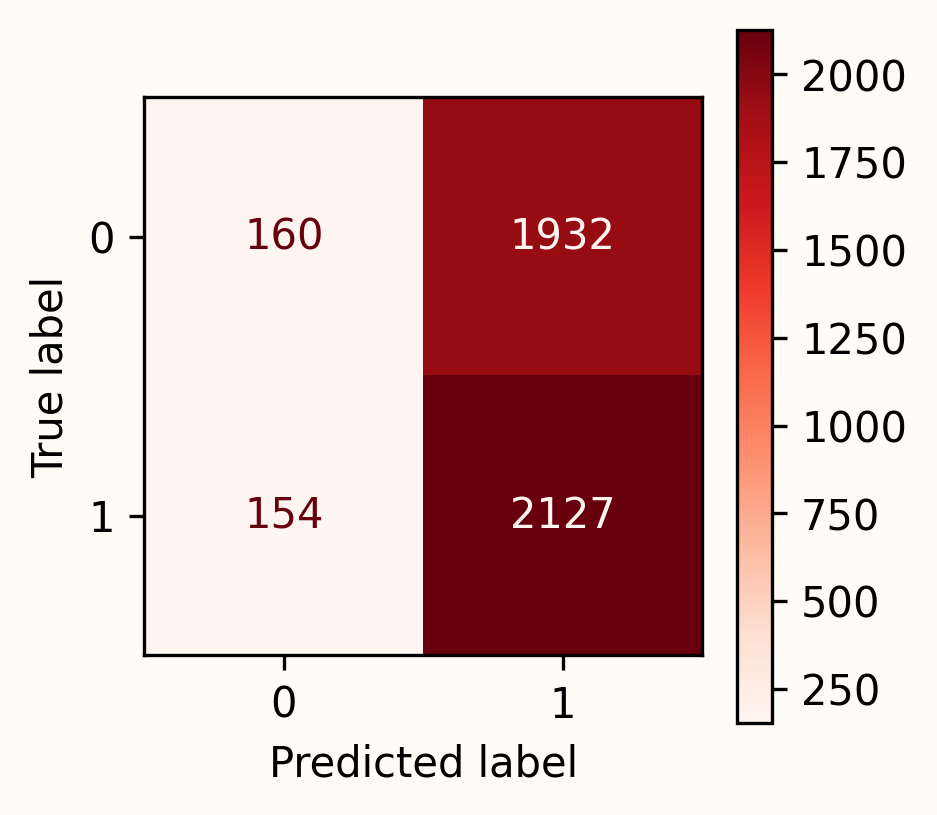

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTrain_neuralnetwork.png")

## Confusion Matrix Test Set

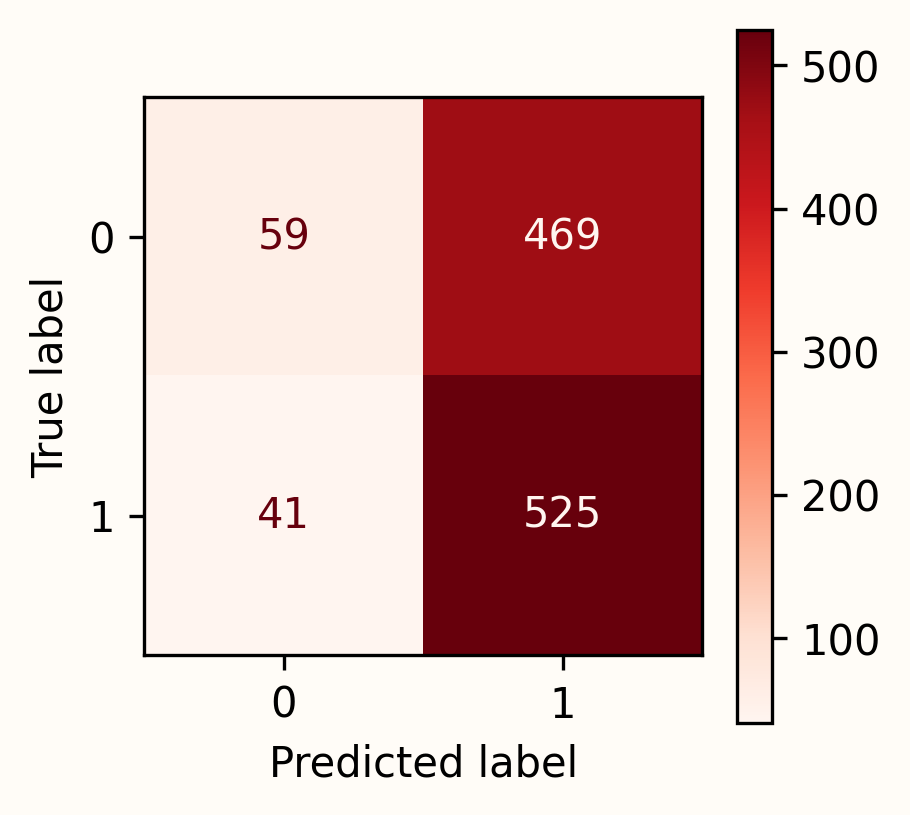

In [35]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTest_neuralnetwork.png")

## Confusion Matrix Validation Set

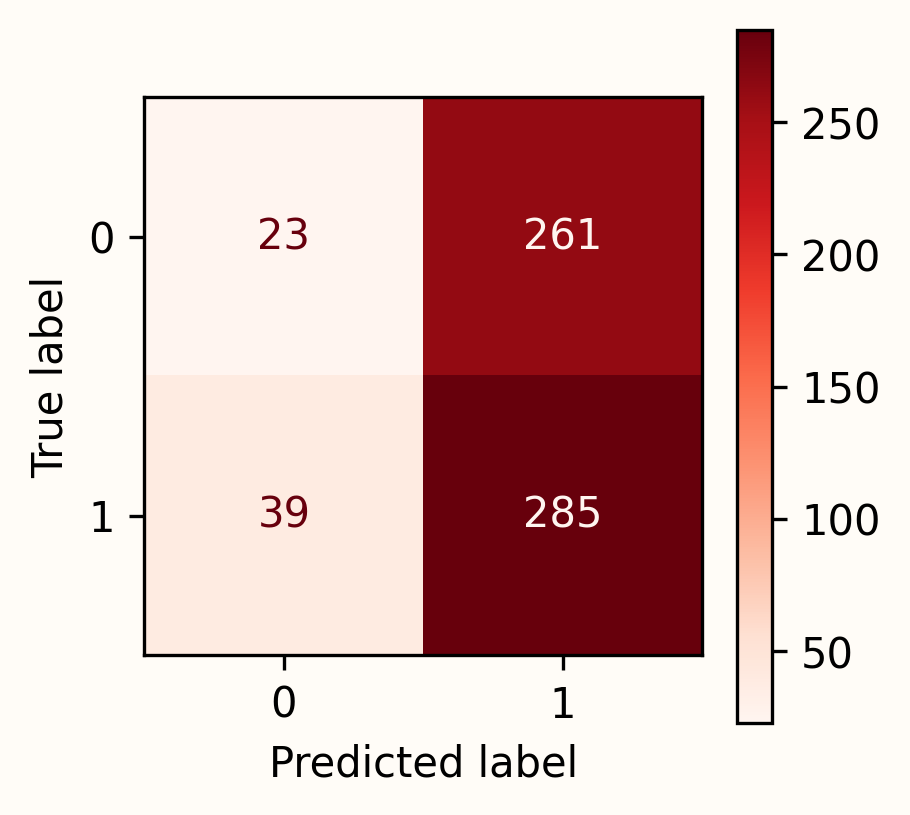

In [36]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_val = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(cm_val, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixValidation_neuralnetwork.png")

## Error Matrix

In [37]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [38]:
error_metric

,Train,Test,Val
accuracy,0.522982,0.533821,0.506579
F1,0.670978,0.673077,0.655172
recall,0.932486,0.927562,0.879630
precission,0.524021,0.528169,0.521978
kappa,0.009295,0.040404,-0.041381


# Export

In [39]:
today = date.today()
model_name = 'neural_network'
description = 'with_feature_selection'

In [40]:
error_metric.to_csv('../data/results/error_metric_{}_{}_{}.csv'.format(model_name,description,today))